In [1]:
import pandas as pd
import numpy as np

In [171]:
df=pd.read_csv("İstanbul_hava_kirliligi_verileri.csv")
df.head()

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
0,"67,07","28,11","2,86","291,07",-,-,-
1,"28,98","10,18","4,15","646,44",-,-,-
2,"37,85","17,37","5,31","508,15",-,-,-
3,"20,67","14,44","4,81","863,59",-,"233,70",-
4,"25,66","11,26","2,17","507,18","57,42","97,30","26,00"


In [172]:
df.dtypes

PM10 ( µg/m3 )      object
PM 2.5 ( µg/m3 )    object
SO2 ( µg/m3 )       object
CO ( µg/m3 )        object
NO2 ( µg/m3 )       object
NOX ( µg/m3 )       object
NO ( µg/m3 )        object
dtype: object

In [173]:
df[-5:]

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
20995,,İstanbul - Yenibosna,CO,µg/m3,"332,05",11.01.2024 00:00,"2.318,72"
20996,,İstanbul - Yenibosna,NO2,µg/m3,"10,25",08.09.2024 00:00,"144,53"
20997,,İstanbul - Yenibosna,NOX,µg/m3,"16,64",18.08.2024 00:00,"850,40"
20998,,İstanbul - Yenibosna,NO,µg/m3,"1,83",21.07.2024 00:00,"461,35"
20999,,21.11.2022 - 31.12.2022 - Min: 364.27 - Max: 3...,,,,,


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PM10 ( µg/m3 )    21000 non-null  object
 1   PM 2.5 ( µg/m3 )  21000 non-null  object
 2   SO2 ( µg/m3 )     21000 non-null  object
 3   CO ( µg/m3 )      21000 non-null  object
 4   NO2 ( µg/m3 )     20955 non-null  object
 5   NOX ( µg/m3 )     20955 non-null  object
 6   NO ( µg/m3 )      20955 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [175]:
# Sadece belirli karakterleri içermeyen satırları kaldırma
filtered_column = "PM10 ( µg/m3 )"  # Baz alınacak sütun

# Regex ile sadece sayılar, "," ve "-" içeren satırları koruma
df = df[df[filtered_column].str.match(r"^[0-9,\-]+$", na=False)]
df[-5:]

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
20987,"42,69",-,"4,75","1.042,80","56,44","118,14","40,32"
20988,"55,97",-,"4,57","1.153,42","68,91","197,07","84,03"
20989,"67,08",-,"5,12","821,03","69,73","275,50","134,13"
20990,"74,77",-,"7,84","590,39","77,40","139,18","40,30"
20991,"37,46",-,"3,86","644,22","39,39","49,02","6,29"


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 20991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PM10 ( µg/m3 )    20774 non-null  object
 1   PM 2.5 ( µg/m3 )  20774 non-null  object
 2   SO2 ( µg/m3 )     20774 non-null  object
 3   CO ( µg/m3 )      20774 non-null  object
 4   NO2 ( µg/m3 )     20774 non-null  object
 5   NOX ( µg/m3 )     20774 non-null  object
 6   NO ( µg/m3 )      20774 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


In [177]:
df.shape

(20774, 7)

In [178]:
df = df.replace("-", np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 20991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PM10 ( µg/m3 )    12819 non-null  object
 1   PM 2.5 ( µg/m3 )  8125 non-null   object
 2   SO2 ( µg/m3 )     7900 non-null   object
 3   CO ( µg/m3 )      7557 non-null   object
 4   NO2 ( µg/m3 )     10334 non-null  object
 5   NOX ( µg/m3 )     8968 non-null   object
 6   NO ( µg/m3 )      8987 non-null   object
dtypes: object(7)
memory usage: 1.3+ MB


In [179]:
df["CO ( µg/m3 )"] = df["CO ( µg/m3 )"].apply(lambda x: str(x).replace(".", "") if pd.notnull(x) else x)

In [180]:
df = df.applymap(lambda x: float(str(x).replace(",", ".")) if pd.notnull(x) else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20774 entries, 0 to 20991
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM10 ( µg/m3 )    12819 non-null  float64
 1   PM 2.5 ( µg/m3 )  8125 non-null   float64
 2   SO2 ( µg/m3 )     7900 non-null   float64
 3   CO ( µg/m3 )      7557 non-null   float64
 4   NO2 ( µg/m3 )     10334 non-null  float64
 5   NOX ( µg/m3 )     8968 non-null   float64
 6   NO ( µg/m3 )      8987 non-null   float64
dtypes: float64(7)
memory usage: 1.3 MB


In [181]:
df.head()

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
0,67.07,28.11,2.86,291.07,NaN,NaN,NaN
1,28.98,10.18,4.15,646.44,NaN,NaN,NaN
2,37.85,17.37,5.31,508.15,NaN,NaN,NaN
3,20.67,14.44,4.81,863.59,NaN,233.7,NaN
4,25.66,11.26,2.17,507.18,57.42,97.3,26.0


In [182]:
print(df.isna().sum())

PM10 ( µg/m3 )       7955
PM 2.5 ( µg/m3 )    12649
SO2 ( µg/m3 )       12874
CO ( µg/m3 )        13217
NO2 ( µg/m3 )       10440
NOX ( µg/m3 )       11806
NO ( µg/m3 )        11787
dtype: int64


In [183]:
# 1. PM10 sütununda NaN olan satırları tespit et
pm10_nan_rows = df["PM10 ( µg/m3 )"].isna()

# 2. Diğer sütunlarda en az bir NaN değeri bulunan satırları tespit et
other_nan_rows = df.isna().sum(axis=1) >= 1 # Bir satırda en az 1 NaN olması durumu

# 3. Hem PM10'da NaN olan hem de en az 2 NaN değeri olan satırları filtrele
rows_to_drop = pm10_nan_rows | other_nan_rows

# 4. Bu satırları DataFrame'den sil
df = df[~rows_to_drop]

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3888 entries, 4 to 19490
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PM10 ( µg/m3 )    3888 non-null   float64
 1   PM 2.5 ( µg/m3 )  3888 non-null   float64
 2   SO2 ( µg/m3 )     3888 non-null   float64
 3   CO ( µg/m3 )      3888 non-null   float64
 4   NO2 ( µg/m3 )     3888 non-null   float64
 5   NOX ( µg/m3 )     3888 non-null   float64
 6   NO ( µg/m3 )      3888 non-null   float64
dtypes: float64(7)
memory usage: 243.0 KB


In [185]:
print(df.isna().sum())

PM10 ( µg/m3 )      0
PM 2.5 ( µg/m3 )    0
SO2 ( µg/m3 )       0
CO ( µg/m3 )        0
NO2 ( µg/m3 )       0
NOX ( µg/m3 )       0
NO ( µg/m3 )        0
dtype: int64


In [186]:
df.mean()

PM10 ( µg/m3 )       41.516916
PM 2.5 ( µg/m3 )     21.205100
SO2 ( µg/m3 )         4.290311
CO ( µg/m3 )        632.017780
NO2 ( µg/m3 )        45.225226
NOX ( µg/m3 )       129.041669
NO ( µg/m3 )         53.680818
dtype: float64

C:\Users\sagla\AppData\Local\Temp\ipykernel_20452\2971809350.py:34: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_original[column], df[column]], palette=["blue", "orange"])
C:\Users\sagla\AppData\Local\Temp\ipykernel_20452\2971809350.py:34: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_original[column], df[column]], palette=["blue", "orange"])
C:\Users\sagla\AppData\Local\Temp\ipykernel_20452\2971809350.py:34: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_original[column], df[column]], palette=["blue", "orange"])
C:\Users\sagla\AppData\Local\Temp\ipykernel_20452\2971809350.py:34: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[df_original[column], df[column]], palette=["blue", "orange"])
C:\Users\sagla\AppData\L

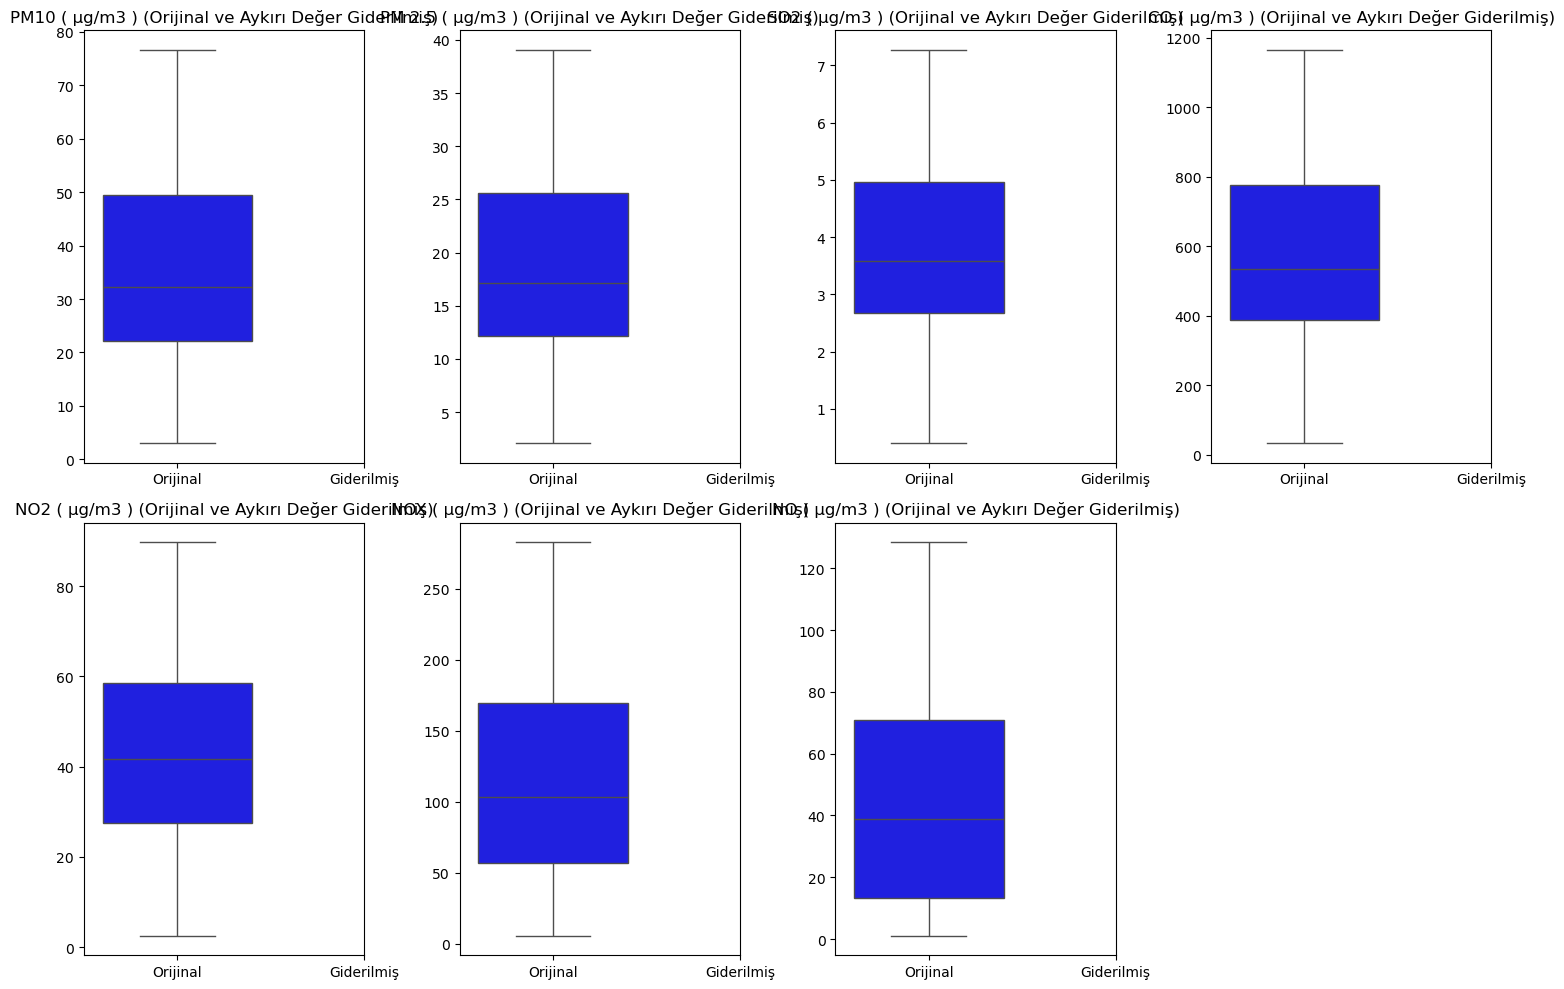

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Aykırı değerleri bulmak için minimal IQR yöntemini kullanma fonksiyonu
def find_outliers_minimal_iqr(dataframe, column, iqr_multiplier=1.0):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return lower_bound, upper_bound

# Aykırı değerleri alt/üst sınır ile değiştirme fonksiyonu
def replace_outliers_with_bounds(dataframe, column, iqr_multiplier=1.0):
    lower_bound, upper_bound = find_outliers_minimal_iqr(dataframe, column, iqr_multiplier)
    dataframe[column] = np.where(dataframe[column] < lower_bound, lower_bound,
                                 np.where(dataframe[column] > upper_bound, upper_bound, dataframe[column]))

# Orijinal veri setinin yedeğini al
df_original = df.copy()

# Kolonları belirleme (veri setinizdeki sayısal kolonlara göre ayarlama yapın)
columns = ['PM10 ( µg/m3 )', 'PM 2.5 ( µg/m3 )', 'SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )', 'NO ( µg/m3 )']

# Aykırı değerleri alt/üst sınır ile değiştirme işlemini her bir kolon için uygulama
for column in columns:
    replace_outliers_with_bounds(df, column, iqr_multiplier=1.0)  # Minimal bir IQR kullan

# Aykırı değer işlemi sonrası box plot ile aykırı değerleri görselleştirme
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=[df_original[column], df[column]], palette=["blue", "orange"])
    plt.title(f'{column} (Orijinal ve Aykırı Değer Giderilmiş)')
    plt.xticks(ticks=[0, 1], labels=['Orijinal', 'Giderilmiş'])
plt.tight_layout()
plt.show()

In [188]:
# NaN değerlerini medyan ile doldurma işlemi
df = df.fillna(df.median())

# Doldurma işleminin sonucunu kontrol etme
print(df.isnull().sum())  # NaN değerlerinin kalıp kalmadığını kontrol et

PM10 ( µg/m3 )      0
PM 2.5 ( µg/m3 )    0
SO2 ( µg/m3 )       0
CO ( µg/m3 )        0
NO2 ( µg/m3 )       0
NOX ( µg/m3 )       0
NO ( µg/m3 )        0
dtype: int64


In [189]:
df.mean()

PM10 ( µg/m3 )       37.575412
PM 2.5 ( µg/m3 )     19.755537
SO2 ( µg/m3 )         3.940260
CO ( µg/m3 )        603.525899
NO2 ( µg/m3 )        44.398219
NOX ( µg/m3 )       120.734716
NO ( µg/m3 )         47.793111
dtype: float64

In [190]:
from sklearn.preprocessing import StandardScaler

# Standard Normalizasyonu için scaler'ı oluşturma
standard_scaler = StandardScaler()

# Normalizasyon yapılacak sayısal kolonlar
numeric_columns = ['PM10 ( µg/m3 )', 'PM 2.5 ( µg/m3 )', 'SO2 ( µg/m3 )', 
                   'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )', 'NO ( µg/m3 )']

# Min-Max Normalizasyonu
df[numeric_columns] = standard_scaler.fit_transform(df[numeric_columns])

In [191]:
df.describe()

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),SO2 ( µg/m3 ),CO ( µg/m3 ),NO2 ( µg/m3 ),NOX ( µg/m3 ),NO ( µg/m3 )
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000
mean,0.469502,0.478137,0.515322,0.503908,0.480370,0.415660,0.366817
std,0.271067,0.263162,0.243398,0.256568,0.248795,0.284272,0.306460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260578,0.273686,0.330422,0.313598,0.285960,0.184307,0.096373
50%,0.396289,0.407250,0.462882,0.443411,0.448521,0.351614,0.296915
75%,0.630289,0.636843,0.665211,0.656799,0.642980,0.592153,0.548186
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [192]:
df.to_csv('İstanbul_hava_kirliligi_verileri_normalized.csv', index=False)

In [193]:
df=pd.read_csv("İstanbul_hava_kirliligi_verileri_normalized.csv")

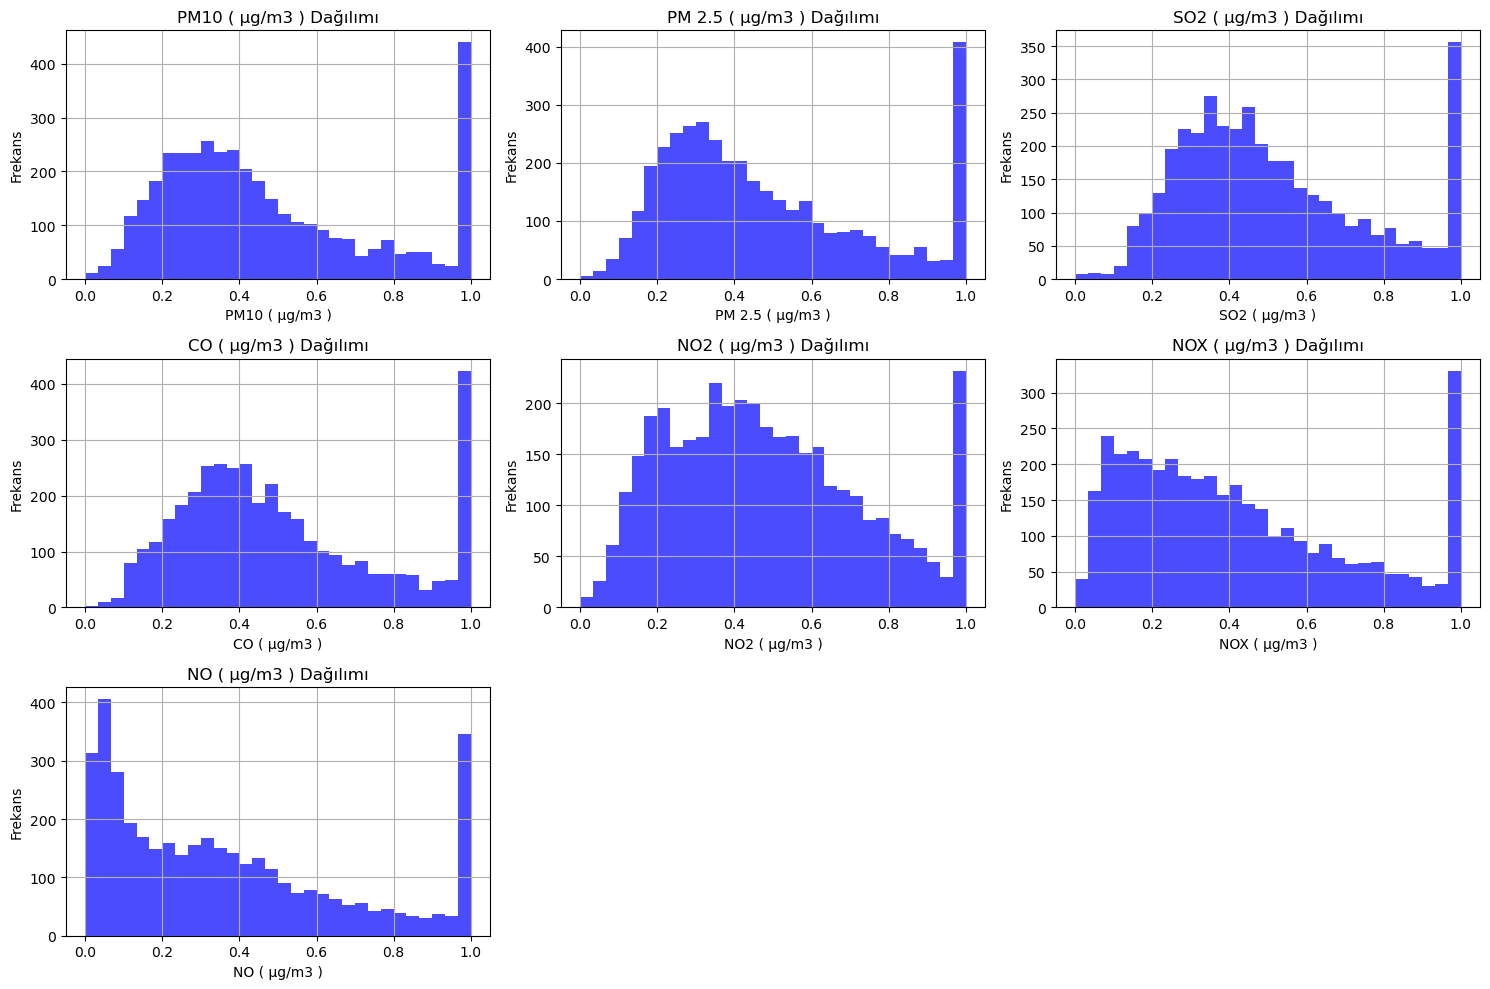

In [194]:
import matplotlib.pyplot as plt

# Sayısal kolonları seçme
numeric_columns = ['PM10 ( µg/m3 )', 'PM 2.5 ( µg/m3 )', 'SO2 ( µg/m3 )', 
                   'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 'NOX ( µg/m3 )', 'NO ( µg/m3 )']

# Histogramları oluşturma
plt.figure(figsize=(15, 10))  # Görselleştirmeyi genişletmek için

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid yerleşimi
    df[column].hist(bins=30, color='blue', alpha=0.7)  # Histogram oluşturma
    plt.title(f'{column} Dağılımı')  # Başlık
    plt.xlabel(column)  # X ekseni etiketi
    plt.ylabel('Frekans')  # Y ekseni etiketi

plt.tight_layout()  # Grafikler arası boşlukları düzenler
plt.show()

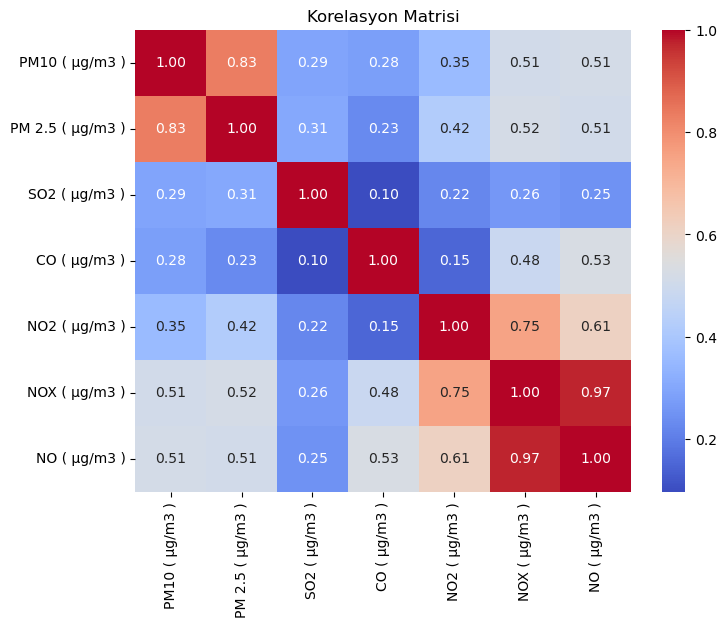

In [195]:

import seaborn as sns

# Korelasyon matrisini hesaplama
correlation_matrix = df.corr()

# Heatmap oluşturma
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Regressor Modelleri
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import BayesianRidge
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBRegressor

# 20 farklı algoritma listesi
regressors = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Support Vector Regressor', SVR()),
    ('KNeighbors Regressor', KNeighborsRegressor()),
    ('DecisionTree Regressor', DecisionTreeRegressor()),
    ('RandomForest Regressor', RandomForestRegressor()),
    ('GradientBoosting Regressor', GradientBoostingRegressor()),
    ('AdaBoost Regressor', AdaBoostRegressor()),
    ('MLP Regressor', MLPRegressor()),
    ('Bagging Regressor', BaggingRegressor()),
    ('ExtraTrees Regressor', ExtraTreesRegressor()),
    ('GaussianProcess Regressor', GaussianProcessRegressor()),
    ('XGBoost Regressor', XGBRegressor()),
    ('Kernel Ridge', KernelRidge()),
    ('BayesianRidge', BayesianRidge()),
    ('PLS Regression', PLSRegression())
]

In [197]:
# Özellikler ve hedef kolonlarını belirleme (sizin veri setinize göre)
# Burada hava kirliliği ile ilgili veriler, yani PM10, PM2.5 gibi veriler özellikler
# 'fiyat' hedef değişkeni varsayalım
X = df[[ 'PM 2.5 ( µg/m3 )', 'SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 
        'NOX ( µg/m3 )', 'NO ( µg/m3 )']]  # Özellikler
y = df['PM10 ( µg/m3 )']  # Hedef (fiyat)

# Veriyi %80 eğitim ve %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Her model için RMSE değerlerini hesapla ve sakla
rmse_results = {}

for name, model in regressors:
    model.fit(X_train, y_train)  # Modeli eğit
    y_pred = model.predict(X_test)  # Test seti üzerinde tahmin yap
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE hesapla
    rmse_results[name] = rmse  # Sonucu sakla

# Sonuçları RMSE'ye göre sırala
sorted_rmse_results = sorted(rmse_results.items(), key=lambda x: x[1])

# Tüm modelleri ve RMSE değerlerini yazdır
print("Model Adı ve RMSE Değeri:")
for name, rmse in sorted_rmse_results:
    print(f"{name}: {rmse:.4f}")

Model Adı ve RMSE Değeri:
Support Vector Regressor: 0.1286
RandomForest Regressor: 0.1290
GradientBoosting Regressor: 0.1295
ExtraTrees Regressor: 0.1317
XGBoost Regressor: 0.1341
KNeighbors Regressor: 0.1351
Bagging Regressor: 0.1356
Kernel Ridge: 0.1377
Ridge Regression: 0.1378
BayesianRidge: 0.1378
Linear Regression: 0.1379
MLP Regressor: 0.1380
PLS Regression: 0.1401
AdaBoost Regressor: 0.1681
DecisionTree Regressor: 0.1848
Lasso Regression: 0.2680
ElasticNet: 0.2680
GaussianProcess Regressor: 0.4908


In [198]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Özellikler ve hedef kolonlarını belirleme
X = df[[ 'PM 2.5 ( µg/m3 )','SO2 ( µg/m3 )', 'CO ( µg/m3 )',  'NO2 ( µg/m3 )', 
        'NOX ( µg/m3 )', 'NO ( µg/m3 )']]  # Özellikler
y = df['PM10 ( µg/m3 )']  # Hedef

# Veriyi %80 eğitim ve %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sonuçları saklamak için listeler
results = []

for name, model in regressors:
    model.fit(X_train, y_train)  # Modeli eğit
    y_pred = model.predict(X_test)  # Test seti üzerinde tahmin yap
    
    # R² skoru hesapla
    r2 = r2_score(y_test, y_pred)
    
    # RMSE hesapla
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Modelin ismi, R² ve RMSE değerlerini sonuçlara ekle
    results.append((name, r2, rmse))

# Sonuçları R²'ye göre sırala
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Tüm modelleri, R² ve RMSE değerlerini yazdır
print("Model Adı, R² Skoru ve RMSE Değeri:")
for name, r2, rmse in sorted_results:
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")


Model Adı, R² Skoru ve RMSE Değeri:
Support Vector Regressor: R² = 0.7699, RMSE = 0.1286
RandomForest Regressor: R² = 0.7690, RMSE = 0.1288
GradientBoosting Regressor: R² = 0.7650, RMSE = 0.1299
ExtraTrees Regressor: R² = 0.7587, RMSE = 0.1317
Bagging Regressor: R² = 0.7520, RMSE = 0.1335
XGBoost Regressor: R² = 0.7496, RMSE = 0.1341
KNeighbors Regressor: R² = 0.7460, RMSE = 0.1351
MLP Regressor: R² = 0.7392, RMSE = 0.1369
Kernel Ridge: R² = 0.7362, RMSE = 0.1377
Ridge Regression: R² = 0.7356, RMSE = 0.1378
BayesianRidge: R² = 0.7355, RMSE = 0.1378
Linear Regression: R² = 0.7355, RMSE = 0.1379
PLS Regression: R² = 0.7267, RMSE = 0.1401
AdaBoost Regressor: R² = 0.6082, RMSE = 0.1678
DecisionTree Regressor: R² = 0.5194, RMSE = 0.1858
Lasso Regression: R² = -0.0001, RMSE = 0.2680
ElasticNet: R² = -0.0001, RMSE = 0.2680
GaussianProcess Regressor: R² = -2.3524, RMSE = 0.4908


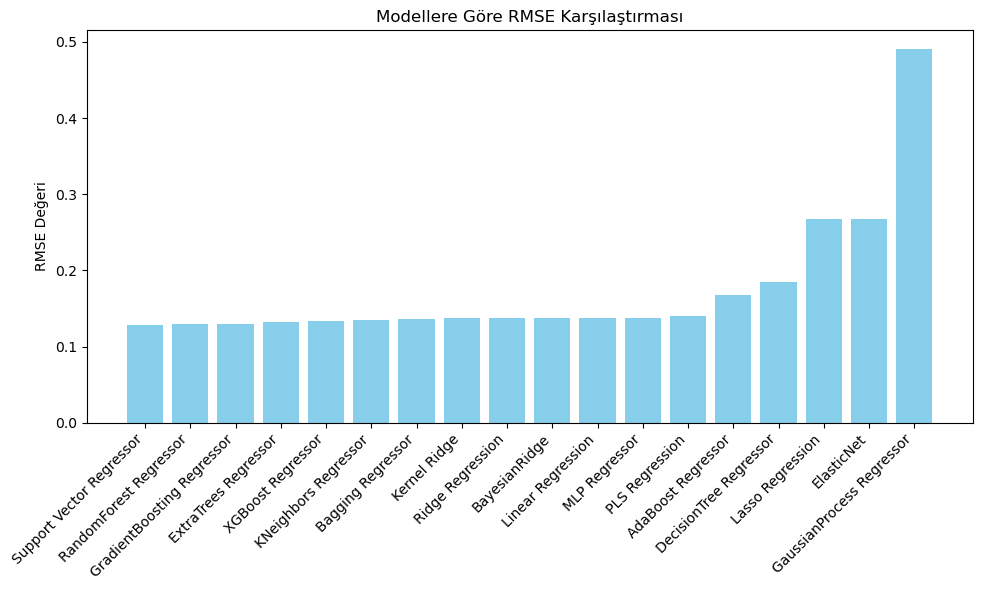

In [199]:
import matplotlib.pyplot as plt

# RMSE sonuçlarını sırala
sorted_rmse_results = sorted(rmse_results.items(), key=lambda x: x[1])

# Model adları ve RMSE değerlerini ayır
model_names = [x[0] for x in sorted_rmse_results]
rmse_values = [x[1] for x in sorted_rmse_results]

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='skyblue')  # Dikey bar grafiği

# X eksenindeki model isimlerinin açısını ayarlama (daha rahat okunabilir olması için)
plt.xticks(rotation=45, ha="right")

# Grafik başlık ve etiketleri
plt.ylabel('RMSE Değeri')
plt.title('Modellere Göre RMSE Karşılaştırması')
plt.tight_layout()

# Grafiği göster
plt.show()


In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Özellikler ve hedef değişkeni belirle
X = df[[ 'PM 2.5 ( µg/m3 )', 'SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 
        'NOX ( µg/m3 )', 'NO ( µg/m3 )']]  # Özellikler
y = df['PM10 ( µg/m3 )']  # Hedef

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SelectKBest ile en iyi özellikleri seç
selector = SelectKBest(score_func=f_regression, k='all')  # Tüm özellikleri incele
X_new = selector.fit_transform(X_train, y_train)

# Özellik skoru ve isimlerini DataFrame'e ekle
feature_scores = pd.DataFrame({'Özellik': X.columns, 'Skor': selector.scores_})

# Skorları sıralayıp yazdır
feature_scores = feature_scores.sort_values(by='Skor', ascending=False)
print(feature_scores)


            Özellik         Skor
0  PM 2.5 ( µg/m3 )  6800.607173
5      NO ( µg/m3 )  1070.839358
4     NOX ( µg/m3 )  1039.255468
3     NO2 ( µg/m3 )   444.469561
1     SO2 ( µg/m3 )   274.663690
2      CO ( µg/m3 )   229.849062


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Özellikler ve hedef değişkeni belirle
X = df[[ 'PM 2.5 ( µg/m3 )', 'SO2 ( µg/m3 )', 'CO ( µg/m3 )', 'NO2 ( µg/m3 )', 
        'NOX ( µg/m3 )', 'NO ( µg/m3 )']]  # Özellikler
y = df['PM10 ( µg/m3 )']  # Hedef

# 1. Adım: SVR modelini standart parametrelerle eğitme
svr_standard = SVR()  # Varsayılan parametreler
svr_standard.fit(X_train, y_train)
y_pred_standard = svr_standard.predict(X_test)
rmse_standard = np.sqrt(mean_squared_error(y_test, y_pred_standard))

# 2. Adım: Parametre tuning ile en iyi parametreleri bulma
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # SVR kernel tipleri
    'C': [1, 10],         # C ceza parametresi
    'epsilon': [0.1, 0.5, 1.0],     # Hata payı (epsilon)
    'gamma': ['scale', 'auto']            # Gamma parametresi
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi RMSE'yi hesaplama
best_svr = grid_search.best_estimator_
y_pred_best = best_svr.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

# Sonuçları birleştirme
results = pd.DataFrame({
    'Model': ['Standart', 'Parametre Tuning'],
    'RMSE': [rmse_standard, rmse_best],
    'En İyi Parametreler': [None, grid_search.best_params_]
})

# Sonuçları yazdırma
print(results)
###